# نمونه ساده اولیه

In [1]:
# نمونه اول  ساده غلط املایی با استفاده از جایگزین کردن

def replace_keyword(word: str, dic: dict = {"سسلامم": "سلام", "سسلام": "سلام"}) -> str:
    '''
    جمله و لیست کلمات غلط و درست را به صورت دیکشنری وارد کنید
    ### نمونه پیش فرض:
    {"خوردنن": "خوردن", "امد": "آمد"}

    '''

    # دیشکنری تبدل به یک ایتم شده و از ایتم نام و مقدار آن درون یک اسم ریخته میشود
    for name, value in dic.items():

        # نام با مقدار جایگزین میشود
        word = word.replace(name, value)

    return word


replace_keyword("سسلام" , {"سسلامم": "سلام", "سسلام": "سلام", "سسام": "سلام", "سسلم": "سلام"})


'سلام'

# نمونه دوم


**پیدا کردن کلمه توسط الگوریتم فاصله همینگ (شباهت)**




101100 # تعداد 6

111000 # تعداد مقایسه ها 2 | تعداد مشابه ها 4

2/6 = 0.33

4/6 = 0.66

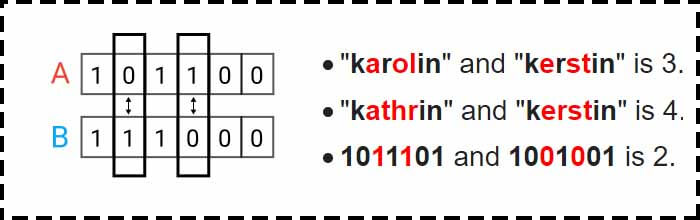

In [3]:
!pip install textdistance  # نصب ماژول

## Supported libraries:

# abydos
# Distance
# jellyfish
# py_stringmatching
# pylev
# python-Levenshtein
# pyxDamerauLevenshtein

## Algorithms:

# DamerauLevenshtein
# Hamming
# Jaro
# JaroWinkler
# Levenshtein


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
import textdistance

# مقایسه
print(textdistance.hamming.normalized_distance('11111', '11111'))

print("--------------------")

#شباهت
print(textdistance.hamming.normalized_similarity('11111', '11111'))

0.0
--------------------
1.0


In [6]:
# ماژول مقایسه متن ها با استفاده از 30 الگوریتم
import textdistance


def find_similarity_hamming(word: str) -> tuple:
    '''
    ### پیدا کردن کلمه با استفاده از الگوریتم شباهت همینگ
  
    '''

    with open("./The_right_words.txt", encoding="utf8") as txt_file:
        datafile = txt_file.read()
        datafile = datafile.splitlines()

    list_number_hamming = []
    keyword = []

    for data in datafile:
        te = textdistance.hamming.normalized_similarity(word, data)
        if te > 0.70:
            list_number_hamming.append(te)
            keyword.append(data)

    di = dict(zip(keyword, list_number_hamming))
    a = sorted(di.items(), key=lambda x: x[1], reverse=True)
    
    if not a:
        return None
    else:
        return a[0]

In [7]:
text = "بستنیی که از مغازه خویده ایم گلون استت"

text_split = text.split()

with open("./The_right_words.txt", encoding="utf8") as txt_file:
    datafile = txt_file.read()
    datafile = datafile.splitlines()
    
word_list = [word for word in text_split if word not in datafile]

for bad_keyword in word_list:
    text = text.replace(bad_keyword, find_similarity_hamming(bad_keyword)[0])

print(text)


بستنی که از مغازه خریده ایم کلون است
